<a href="https://colab.research.google.com/github/fernandovieira1/ML-e-DS-com-Python-de-A-a-Z/blob/master/parte1_classif_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## census

In [1]:
from sklearn.neural_network import MLPClassifier

In [2]:
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
import pickle
with open('census.pkl', 'rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [5]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [6]:
x_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [17]:
# decidar qtas. camadas ocultas: nr. entradas + 1 / 2
(108+1)/2

54.5

In [18]:
rede_neural_census = MLPClassifier(max_iter=1000, verbose=True, tol=0.00001, solver='adam', activation='relu', hidden_layer_sizes=(55,55)) 
# verbose: mostra os erros (loss), o que ajuda a comparar se o gradiente descendente esta funcionando conforme as iteracoes nos pesos acontecem.
# tol: de epoca em epoca o valor do erro tem de diminuir conforme o tempo passa (qto mais, maior o numero de iteracoes)
# Estas duas variaveis sao criticas -- "brincar" com elas
# Consultar a documentacao e pesquisar se vale a pena alterar outros valores padrao/default

rede_neural_census.fit(x_census_treinamento, y_census_treinamento)

Iteration 1, loss = 0.40100079
Iteration 2, loss = 0.32924917
Iteration 3, loss = 0.31531252
Iteration 4, loss = 0.30808675
Iteration 5, loss = 0.30243601
Iteration 6, loss = 0.29909116
Iteration 7, loss = 0.29594624
Iteration 8, loss = 0.29274821
Iteration 9, loss = 0.28952497
Iteration 10, loss = 0.28790246
Iteration 11, loss = 0.28628435
Iteration 12, loss = 0.28338776
Iteration 13, loss = 0.28131155
Iteration 14, loss = 0.28016021
Iteration 15, loss = 0.27708300
Iteration 16, loss = 0.27598497
Iteration 17, loss = 0.27452957
Iteration 18, loss = 0.27257655
Iteration 19, loss = 0.27109190
Iteration 20, loss = 0.27001225
Iteration 21, loss = 0.26869313
Iteration 22, loss = 0.26611485
Iteration 23, loss = 0.26486368
Iteration 24, loss = 0.26320271
Iteration 25, loss = 0.26132325
Iteration 26, loss = 0.26055468
Iteration 27, loss = 0.25896293
Iteration 28, loss = 0.25717340
Iteration 29, loss = 0.25630592
Iteration 30, loss = 0.25498511
Iteration 31, loss = 0.25369824
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(55, 55), max_iter=1000, tol=1e-05,
              verbose=True)

In [19]:
previsoes = rede_neural_census.predict(x_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [20]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [21]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

0.8176049129989764

In [22]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88      3693
        >50K       0.63      0.62      0.62      1192

    accuracy                           0.82      4885
   macro avg       0.75      0.75      0.75      4885
weighted avg       0.82      0.82      0.82      4885



0.8176049129989764

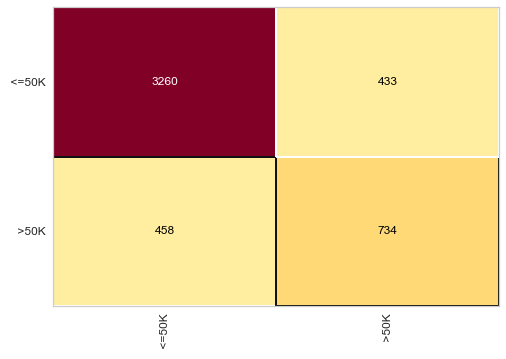

In [23]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rede_neural_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)